# Assignment 1

First we need to import a few modules, execute the cell below:

In [45]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [46]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    return numpy.cos(x)

You can use the following cell to check that your code works for scalar arguments:

In [47]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [48]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [49]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    return -numpy.sin(x)

In [50]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [51]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [52]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return (f(x) - f(x - dx))/dx

In [53]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


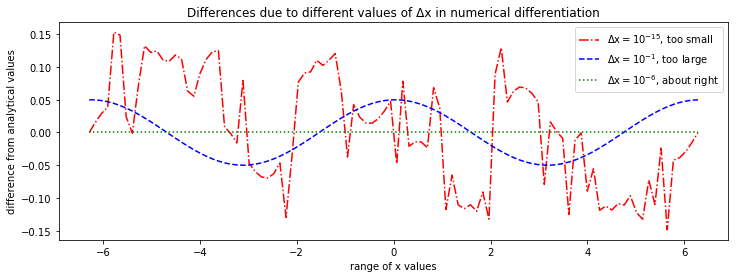

Ideally, the curves should be as close to zero as possible,
but this is clearly not the case here for the extreme cases.

NOTE: The curve for Δx too large looks like a sin curve due
to the nature of the differential obtained using that value.
The numerical derivative is almost a straight line (zero gradient),
hence the difference with the analytical derivative is just the
analytical derivative itself, hence a sin curve.


In [72]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)

df_dx_small = backward_difference(f, xs, dx=1e-15)
df_dx_large = backward_difference(f, xs, dx=1e-1)
df_dx_similar = backward_difference(f, xs, dx=1e-6)

df_dx_analytical = df_analytic(xs)

plt.figure(figsize=(12, 4))

plt.plot(xs, df_dx_small    - df_dx_analytical,color="red",linestyle="-.",label="$\mathregular{\Delta x = 10^{- 15}}$, too small")
plt.plot(xs, df_dx_large    - df_dx_analytical,color="blue",linestyle="--",label="$\mathregular{\Delta x = 10^{- 1}}$, too large")
plt.plot(xs, df_dx_similar  - df_dx_analytical,color="green",linestyle=":",label="$\mathregular{\Delta x = 10^{- 6}}$, about right")
plt.xlabel("range of x values")
plt.ylabel("difference from analytical values")
plt.legend(loc="best")
plt.title("Differences due to different values of Δx in numerical differentiation")

plt.show()

print ("Ideally, the curves should be as close to zero as possible,")
print ("but this is clearly not the case here for the extreme cases.")
print ("\nNOTE: The curve for Δx too large looks like a sin curve due")
print ("to the nature of the differential obtained using that value.")
print ("The numerical derivative is almost a straight line (zero gradient),")
print ("hence the difference with the analytical derivative is just the")
print ("analytical derivative itself, hence a sin curve.")

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)



It is known that computers store numbers with a finite numbers of digits. This means that if a value with more than a certain number of digits (usually 16) is supplied, the machine will only save a finite amount of those digits. During calculations involving such numbers, required digits will be produced by the computer as seen fit, but will not necessarily be the same as the ones initally supplied.

This process can lead to errors, especially if values get very small and are used to do calculations with other numbers that are much larger than the one discussed.

Considering the following formula:

$\frac{f(x_{0}+\Delta x)-f(x_{0}))}{\Delta x}$     

Case where $\Delta x$ is too small:

We notice that $\Delta x$ is in the denominator.
In the numerator, the value is likely to be larger than the denominator. This means that it will only store digits that are at a higher level (higher power of ten, ex. If we store only 4 digits, $x=0.454673456$ becomes $x=0.4547$, while $\Delta x$ remains for ex. $0.00001234$) compared to the digits in the denominator. Hence, when the computer has to divide the numerator by the denominator, it has to produce some missing digits to complete the calculation. These missing digits cause errors by providing slightly different answers than otherwise expected.

Case where $\Delta x$ is too large:

In this case the reason is simply that the derivative becomes unreliable. This is because the larger $\Delta x$ is, the less the formula takes into account the curvature of the graph at a certain point. 

A clear example of this is $y=sin(x)$. If $\Delta x$ is too large, the derivative stops taking into account the different valleys and peaks, erroneuosly giving a result that is fairly close to a horizontal line (due to how the funtion looks).
(This effect can be seen in task 1, while looking at the curve $\Delta x$ is too large. The explanation is underneath the graph)